<a href="https://colab.research.google.com/github/GuilhermeCDiniz/exploratory-analysis---study/blob/main/exploratory_analysis_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/supermarket_sales.csv')

In [5]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**1. Qual faturamento total por filial?**

In [6]:
df.groupby('City')['Total'].sum()

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


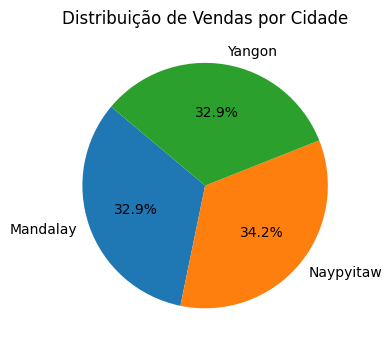

In [35]:
vendas_por_cidade = df.groupby('City')['Total'].sum()


plt.figure(figsize=(4, 4))
vendas_por_cidade.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Vendas por Cidade')
plt.ylabel('')  # Remove o label do eixo y
plt.tight_layout()
plt.show()

**2. Qual a percentual de participação na receita de cada tipo de produto?**

In [36]:
(df.groupby('Product line')['Total'].sum() / df.groupby('Product line')['Total'].sum().sum()).sort_values()*100

,Total
Product line,
Health and beauty,15.231828
Home and lifestyle,16.677232
Fashion accessories,16.814702
Electronic accessories,16.824497
Sports and travel,17.067648
Food and beverages,17.384094


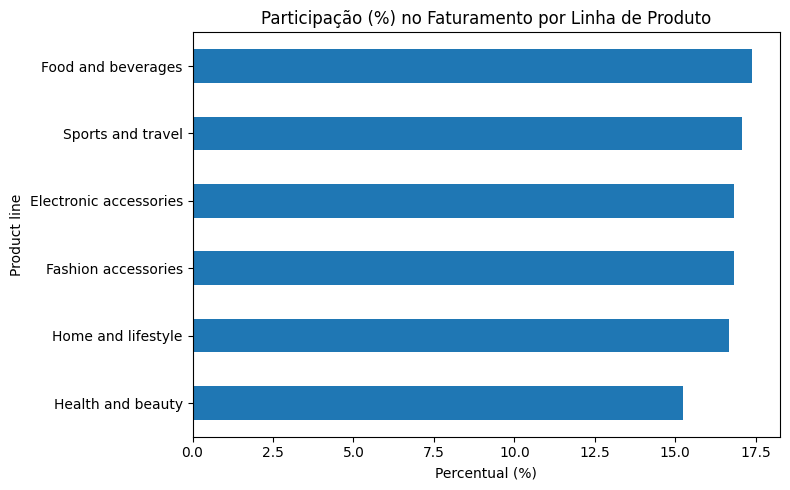

In [37]:
percentuais = (df.groupby('Product line')['Total'].sum() / df['Total'].sum()).sort_values() * 100


plt.figure(figsize=(8, 5))
percentuais.plot(kind='barh')
plt.title('Participação (%) no Faturamento por Linha de Produto')
plt.xlabel('Percentual (%)')
plt.tight_layout()
plt.show()

**3. Como está distribuido o tipo de produto consumido por genero?**

In [16]:
df.groupby(['Product line', 'Gender'])[['Total']].sum() .pivot_table(index='Product line', columns='Gender', values='Total')

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


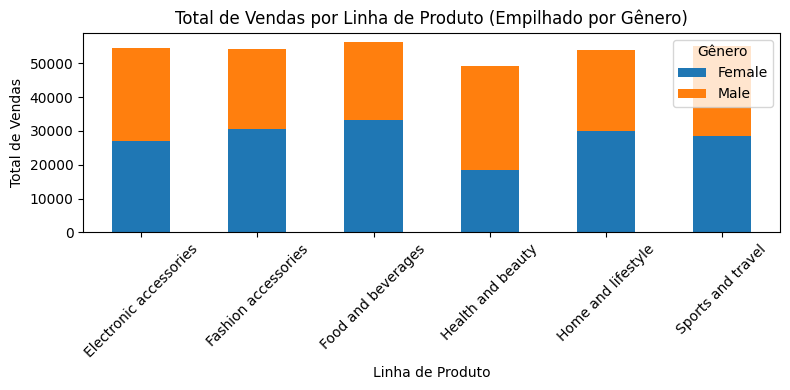

In [42]:
pivot = df.groupby(['Product line', 'Gender'])[['Total']].sum().pivot_table(index='Product line', columns='Gender', values='Total')

pivot.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Total de Vendas por Linha de Produto (Empilhado por Gênero)')
plt.xlabel('Linha de Produto')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()


**1. QUal faturamento por mês?**

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply (lambda x: x.month)
df['Year'] = df['Date'].apply (lambda x: x.year)

In [20]:
df.groupby(['Month', 'Year'])[['Total']].sum()

,,Total
Month,Year,
1,2019,116291.868
2,2019,97219.374
3,2019,109455.507


**5. Qual foi a média de avaliação por cada filial em janeiro de 2019?**

In [21]:
df[(df['Year']==2019) & ( df ['Month'] == 1)] ["Rating"].mean()

np.float64(7.017613636363635)

**6. Como se distribui o gasto por tipo de consumidor em cada filial?**

In [22]:
df.groupby(["Customer type", "City"]) ["Total"].sum()

Customer type  City     
Member         Mandalay     53704.6860
               Naypyitaw    56881.2825
               Yangon       53637.4755
Normal         Mandalay     52492.9860
               Naypyitaw    53687.4240
               Yangon       52562.8950
Name: Total, dtype: float64